In [1]:
from netCDF4 import Dataset as NetCDFFile
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import xarray as xr
from numpy import meshgrid
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import findfont, FontProperties
from mpl_toolkits.basemap import Basemap
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
font = findfont(FontProperties(family=['sans-serif']))
font


'/System/Library/Fonts/LucidaGrande.ttc'

## PDSI maps, Europe 1314, 1315, 1316, 1317:

In [2]:
owda = xr.open_dataset('owda_hd_fix_500.nc').pdsi
xx,yy=meshgrid(owda.lat,owda.lon)

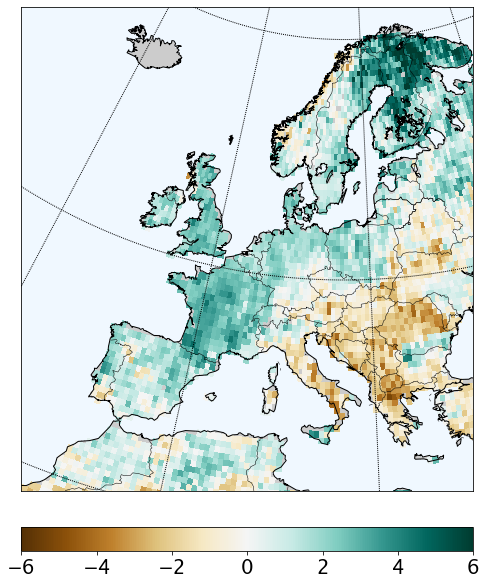

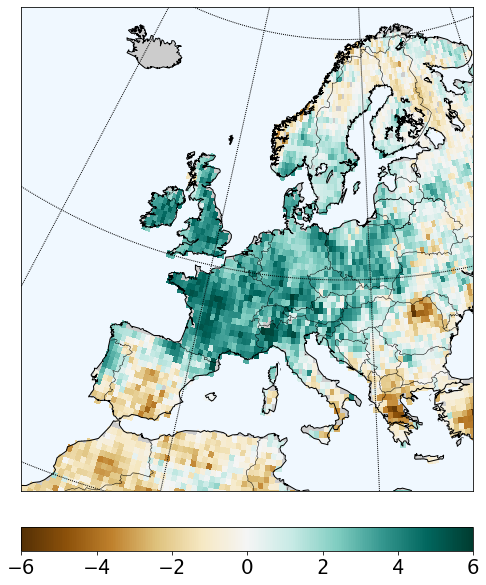

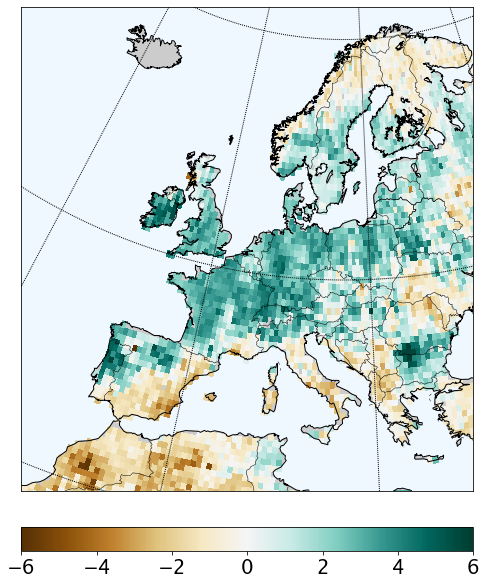

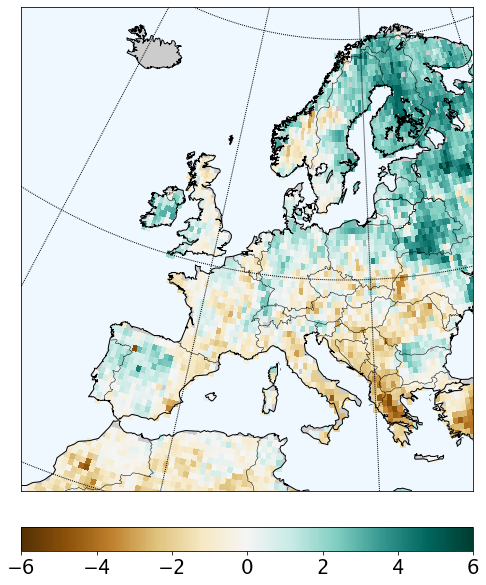

In [4]:
for i in np.arange(4):
    data=np.squeeze(owda.sel(time=slice(1314+i,1314+i)))
    
    plt.figure(figsize=(15,10))
    map = Basemap(projection='aea',lat_0=49.25,lon_0=16.75,llcrnrlon=-11.75,llcrnrlat=27.75,urcrnrlon=44.75,urcrnrlat=70.75,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawlsmask(ocean_color='aliceblue')
    parallels = np.arange(30,90,20)
    meridians = np.arange(-20,60,20)
    map.drawparallels(parallels)
    map.drawmeridians(meridians)
    map.pcolormesh(yy-0.5,xx-0.5,np.array(data),cmap='BrBG',latlon=True, vmin=-6, vmax=6)
    cbar = map.colorbar(location='bottom',pad=0.5)
    cbar.ax.tick_params(labelsize=20) 
    


## PDSI rankings for 1314, 1315, 1316, 1317

In [5]:
ranking = np.zeros((4,114,88));
index1 = np.sort(owda[:,:,1300::],axis=2)
for a in range(0,4):
    for x in range(0,114):
        for y in range(0,88):
            if np.isnan(index1[x,y,0])==True:
                ranking[a,x,y] = np.nan
            else:
                #reverse rank to rank from wet to dry
                ind = [i for i,j in enumerate(index1[x,y,:][::-1] == np.array(owda[x,y,1314+a])) if j==1]
                ranking[a,x,y] = ind[0]+1#index to ranking conversion
                

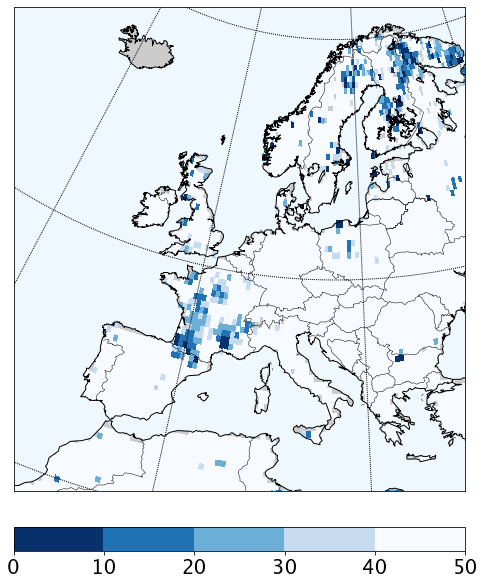

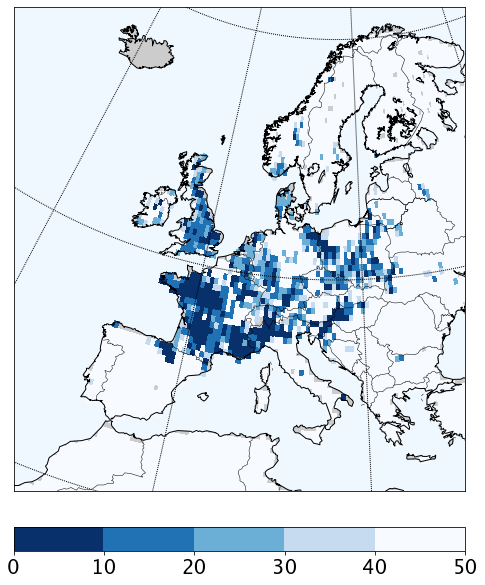

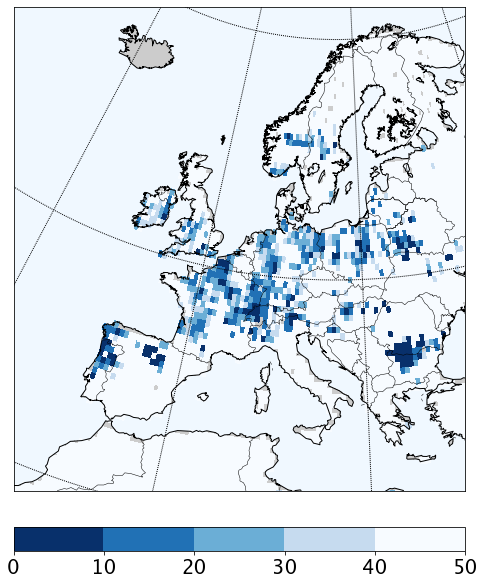

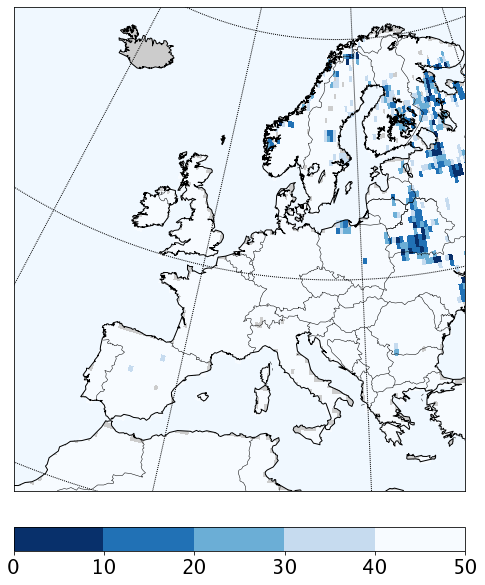

In [6]:
for a in np.arange(0,4):
    data=ranking[a,:,:]
    
    plt.figure(figsize=(15,10))
    map = Basemap(projection='aea',lat_0=49.25,lon_0=16.75,llcrnrlon=-11.75,llcrnrlat=27.75,urcrnrlon=44.75,urcrnrlat=70.75,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawlsmask(ocean_color='aliceblue')
    parallels = np.arange(30,90,20.) # make latitude lines ever 5 degrees from 30N-50N
    meridians = np.arange(-20,60,20)
    map.drawparallels(parallels)
    map.drawmeridians(meridians)
    map.pcolormesh(yy-0.5,xx-0.5,np.array(data),cmap=plt.cm.get_cmap('Blues_r', 5),latlon=True,vmin=0, vmax=50)
    cbar = map.colorbar(location='bottom',pad=0.5)
    cbar.ax.tick_params(labelsize=20) 
    cbar.set_ticks([0,10,20,30,40,50])
    
    

## PDSI Ranking for 1314-1316 Three Year Period

In [7]:
owda3 = owda.rolling(time=3, center=False).mean()
ranking3 = np.zeros((114,88));
index1 = np.sort(owda3[:,:,1002::],axis=2)#leave out 1300 and 1301 bc sliding 3-yr window
for x in range(0,114):
    for y in range(0,88):
        if np.isnan(index1[x,y,0])==True:
            ranking3[x,y] = np.nan
        else:
            ind = [i for i,j in enumerate(index1[x,y,:][::-1] == np.array(owda3[x,y,1316])) if j==1]
            ranking3[x,y] = ind[0]+1#index to ranking conversion
            

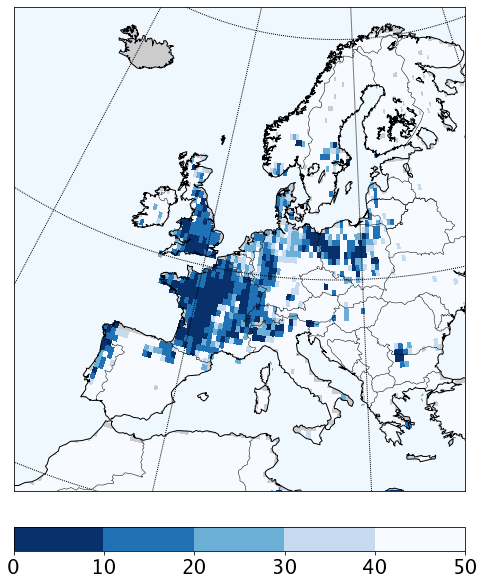

In [9]:
data=ranking3
    
plt.figure(figsize=(15,10))
map = Basemap(projection='aea',lat_0=49.25,lon_0=16.75,llcrnrlon=-11.75,llcrnrlat=27.75,urcrnrlon=44.75,urcrnrlat=70.75,resolution='l')
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(ocean_color='aliceblue')
parallels = np.arange(30,90,20.) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-20,60,20)
map.drawparallels(parallels)
map.drawmeridians(meridians)
map.pcolormesh(yy-0.5,xx-0.5,np.array(data),cmap=plt.cm.get_cmap('Blues_r',5),latlon=True,vmin=0, vmax=50)
cbar = map.colorbar(location='bottom',pad=0.5)
cbar.ax.tick_params(labelsize=20) 
cbar.set_ticks([0,10,20,30,40,50])

